In [3]:
import pandas as pd
import numpy as np

In [4]:
base_df = pd.read_csv('WorldCupMatches.csv')
base_df.Year = base_df.Year.astype(np.int64)
base_df

Year              Datetime                     Stage  \
0    1930  13 Jul 1930 - 15:00                    Group 1   
1    1930  13 Jul 1930 - 15:00                    Group 4   
2    1930  14 Jul 1930 - 12:45                    Group 2   
3    1930  14 Jul 1930 - 14:50                    Group 3   
4    1930  15 Jul 1930 - 16:00                    Group 1   
..    ...                   ...                       ...   
847  2014  05 Jul 2014 - 17:00             Quarter-finals   
848  2014  08 Jul 2014 - 17:00                Semi-finals   
849  2014  09 Jul 2014 - 17:00                Semi-finals   
850  2014  12 Jul 2014 - 17:00   Play-off for third place   
851  2014  13 Jul 2014 - 16:00                      Final   

                 Stadium             City Home Team Name  Home Team Goals  \
0                Pocitos      Montevideo          France              4.0   
1         Parque Central      Montevideo             USA              3.0   
2         Parque Central      Montevideo      Yugoslavia              2.0   
3                Pocitos      Montevideo         Romania              3.0   
4         Parque Central      Montevideo       Argentina              1.0   
..                   ...              ...            ...              ...   
847     Arena Fonte Nova        Salvador     Netherlands              0.0   
848     Estadio Mineirao  Belo Horizonte          Brazil              1.0   
849   Arena de Sao Paulo       Sao Paulo     Netherlands              0.0   
850     Estadio Nacional        Brasilia          Brazil              0.0   
851  Estadio do Maracana  Rio De Janeiro         Germany              1.0   

     Away Team Goals Away Team Name  Attendance  Half-time Home Goals  \
0                1.0         Mexico      4444.0                   3.0   
1                0.0        Belgium     18346.0                   2.0   
2                1.0         Brazil     24059.0                   2.0   
3                1.0           Peru      2549.0                   1.0   
4                0.0         France     23409.0                   0.0   
..               ...            ...         ...                   ...   
847              0.0     Costa Rica     51179.0                   0.0   
848              7.0        Germany     58141.0                   0.0   
849              0.0      Argentina     63267.0                   0.0   
850              3.0    Netherlands     68034.0                   0.0   
851              0.0      Argentina     74738.0                   0.0   

     Half-time Away Goals                 Referee  \
0                     0.0  LOMBARDI Domingo (URU)   
1                     0.0       MACIAS Jose (ARG)   
2                     0.0     TEJADA Anibal (URU)   
3                     0.0   WARNKEN Alberto (CHI)   
4                     0.0     REGO Gilberto (BRA)   
..                    ...                     ...   
847                   0.0   Ravshan IRMATOV (UZB)   
848                   5.0   RODRIGUEZ Marco (MEX)   
849                   0.0      Cüneyt ÇAKIR (TUR)   
850                   2.0   HAIMOUDI Djamel (ALG)   
851                   0.0    Nicola RIZZOLI (ITA)   

                     Assistant 1                 Assistant 2   RoundID  \
0          CRISTOPHE Henry (BEL)         REGO Gilberto (BRA)     201.0   
1       MATEUCCI Francisco (URU)       WARNKEN Alberto (CHI)     201.0   
2        VALLARINO Ricardo (URU)         BALWAY Thomas (FRA)     201.0   
3            LANGENUS Jean (BEL)    MATEUCCI Francisco (URU)     201.0   
4           SAUCEDO Ulises (BOL)  RADULESCU Constantin (ROU)     201.0   
..                           ...                         ...       ...   
847  RASULOV Abduxamidullo (UZB)    KOCHKAROV Bakhadyr (KGZ)  255953.0   
848      TORRENTERA Marvin (MEX)       QUINTERO Marcos (MEX)  255955.0   
849         DURAN Bahattin (TUR)           ONGUN Tarik (TUR)  255955.0   
850         ACHIK Redouane (MAR)     ETCHIALI Abdelhak (ALG)  255957.0   
851        Renato F

In [5]:
prob_dict = {}
game_count = {}
for y in base_df.Year.unique():
    tmp = base_df[base_df['Year']==y]
    win_dcit = {}
    game_dict = {}
    for idx, v in enumerate((tmp[['Home Team Name','Home Team Goals','Away Team Goals','Away Team Name']].values)):
        cnt, cnt2 = 0, 0
        game_dict[v[0]] = cnt2+1 if v[0] not in game_dict.keys() else game_dict[v[0]]+1
        game_dict[v[-1]] = cnt2+1 if v[-1] not in game_dict.keys() else game_dict[v[-1]]+1
        if v[1] > v[2]:
            win_dcit[v[0]] = cnt+1 if v[0] not in win_dcit.keys() else win_dcit[v[0]]+1
            win_dcit[v[-1]] = 0 if v[-1] not in win_dcit.keys() else win_dcit[v[-1]]
        elif v[1] < v[2]:
            win_dcit[v[-1]] = cnt+1 if v[-1] not in win_dcit.keys() else win_dcit[v[-1]]+1
            win_dcit[v[0]] = 0 if v[0] not in win_dcit.keys() else win_dcit[v[0]]
    prob_dict[y] = win_dcit
    game_count[y] = game_dict


In [27]:
info_df = pd.read_csv('WorldCupsSummary.csv')
info_df = info_df.iloc[:-1, :]
info_df

Year   HostCountry      Winner          Second        Third  \
0   1930       Uruguay     Uruguay       Argentina          USA   
1   1934         Italy       Italy  Czechoslovakia      Germany   
2   1938        France       Italy         Hungary       Brazil   
3   1950        Brazil     Uruguay          Brazil       Sweden   
4   1954   Switzerland  Germany FR         Hungary      Austria   
5   1958        Sweden      Brazil          Sweden       France   
6   1962         Chile      Brazil  Czechoslovakia        Chile   
7   1966       England     England      Germany FR     Portugal   
8   1970        Mexico      Brazil           Italy   Germany FR   
9   1974       Germany  Germany FR     Netherlands       Poland   
10  1978     Argentina   Argentina     Netherlands       Brazil   
11  1982         Spain       Italy      Germany FR       Poland   
12  1986        Mexico   Argentina      Germany FR       France   
13  1990         Italy  Germany FR       Argentina        Italy   
14  1994           USA      Brazil           Italy       Sweden   
15  1998        France      France          Brazil      Croatia   
16  2002   Korea/Japan      Brazil         Germany       Turkey   
17  2006       Germany       Italy          France      Germany   
18  2010  South Africa       Spain     Netherlands      Germany   
19  2014        Brazil     Germany       Argentina  Netherlands   

            Fourth  GoalsScored  QualifiedTeams  MatchesPlayed  Attendance  \
0       Yugoslavia           70              13             18      590549   
1          Austria           70              16             17      363000   
2           Sweden           84              15             18      375700   
3            Spain           88              13             22     1045246   
4          Uruguay          140              16             26      768607   
5       Germany FR          126              16             35      819810   
6       Yugoslavia           89              16             32      893172   
7     Soviet Union           89              16             32     1563135   
8          Uruguay           95              16             32     1603975   
9           Brazil           97              16             38     1865753   
10           Italy          102              16             38     1545791   
11          France          146              24             52     2109723   
12         Belgium          132              24             52     2394031   
13         England          115              24             52     2516215   
14        Bulgaria          141              24             52     3587538   
15     Netherlands          171              32             64     2785100   
16  Korea Republic          161              32             64     2705197   
17        Portugal          147              32             64     3359439   
18         Uruguay          145              32             64     3178856   
19          Brazil          171              32             64     3386810   

   HostContinent WinnerContinent  
0        America         America  
1         Europe          Europe  
2         Europe          Europe  
3        America         America  
4         Europe          Europe  
5         Europe         America  
6        America         America  
7         Europe          Europe  
8        America         America  
9         Europe          Europe  
10       America         America  
11        Europe          Europe  
12       America         America  
13        Europe          Europe  
14       America         America  
15        Europe          Europe  
16          Asia         America  
17        Europe          Europe  
18        Africa          Europe  
19       America          Europe

In [28]:
win_rate = []

for y in info_df['Year'].unique():
    if y!=2018:
        tmp = info_df[info_df['Year']==y]
        winner = tmp.Winner.values[0]
        matches = game_count[y][winner]
        win_num = prob_dict[y][winner]
        win_rate.append(win_num/matches)
info_df['win_rate'] = win_rate
info_df


Year   HostCountry      Winner          Second        Third  \
0   1930       Uruguay     Uruguay       Argentina          USA   
1   1934         Italy       Italy  Czechoslovakia      Germany   
2   1938        France       Italy         Hungary       Brazil   
3   1950        Brazil     Uruguay          Brazil       Sweden   
4   1954   Switzerland  Germany FR         Hungary      Austria   
5   1958        Sweden      Brazil          Sweden       France   
6   1962         Chile      Brazil  Czechoslovakia        Chile   
7   1966       England     England      Germany FR     Portugal   
8   1970        Mexico      Brazil           Italy   Germany FR   
9   1974       Germany  Germany FR     Netherlands       Poland   
10  1978     Argentina   Argentina     Netherlands       Brazil   
11  1982         Spain       Italy      Germany FR       Poland   
12  1986        Mexico   Argentina      Germany FR       France   
13  1990         Italy  Germany FR       Argentina        Italy   
14  1994           USA      Brazil           Italy       Sweden   
15  1998        France      France          Brazil      Croatia   
16  2002   Korea/Japan      Brazil         Germany       Turkey   
17  2006       Germany       Italy          France      Germany   
18  2010  South Africa       Spain     Netherlands      Germany   
19  2014        Brazil     Germany       Argentina  Netherlands   

            Fourth  GoalsScored  QualifiedTeams  MatchesPlayed  Attendance  \
0       Yugoslavia           70              13             18      590549   
1          Austria           70              16             17      363000   
2           Sweden           84              15             18      375700   
3            Spain           88              13             22     1045246   
4          Uruguay          140              16             26      768607   
5       Germany FR          126              16             35      819810   
6       Yugoslavia           89              16             32      893172   
7     Soviet Union           89              16             32     1563135   
8          Uruguay           95              16             32     1603975   
9           Brazil           97              16             38     1865753   
10           Italy          102              16             38     1545791   
11          France          146              24             52     2109723   
12         Belgium          132              24             52     2394031   
13         England          115              24             52     2516215   
14        Bulgaria          141              24             52     3587538   
15     Netherlands          171              32             64     2785100   
16  Korea Republic          161              32             64     2705197   
17        Portugal          147              32             64     3359439   
18         Uruguay          145              32             64     3178856   
19          Brazil          171              32             64     3386810   

   HostContinent WinnerContinent  win_rate  
0        America         America  1.000000  
1         Europe          Europe  0.800000  
2         Europe          Europe  1.000000  
3        America         America  0.750000  
4         Europe          Europe  0.833333  
5         Europe         America  0.833333  
6        America         America  0.833333  
7         Europe          Europe  0.833333  
8        America         America  1.000000  
9         Europe          Europe  0.857143  
10       America         America  0.714286  
11        Europe          Europe  0.571429  
12       America         America  0.857143  
13        Europe          Europe  0.714286  
14       America         America  0.714286  
15        Europe          Europe  0.857143  
16          Asia         America  1.000000  
17        Europe          Europe  0.714286  
18        Africa          Europe  0.857143  
19       America          Europe  0.909091

In [29]:
info_df.Winner = info_df.Winner.str.replace('Germany FR', 'Germany')
info_df

Year   HostCountry     Winner          Second        Third  \
0   1930       Uruguay    Uruguay       Argentina          USA   
1   1934         Italy      Italy  Czechoslovakia      Germany   
2   1938        France      Italy         Hungary       Brazil   
3   1950        Brazil    Uruguay          Brazil       Sweden   
4   1954   Switzerland    Germany         Hungary      Austria   
5   1958        Sweden     Brazil          Sweden       France   
6   1962         Chile     Brazil  Czechoslovakia        Chile   
7   1966       England    England      Germany FR     Portugal   
8   1970        Mexico     Brazil           Italy   Germany FR   
9   1974       Germany    Germany     Netherlands       Poland   
10  1978     Argentina  Argentina     Netherlands       Brazil   
11  1982         Spain      Italy      Germany FR       Poland   
12  1986        Mexico  Argentina      Germany FR       France   
13  1990         Italy    Germany       Argentina        Italy   
14  1994           USA     Brazil           Italy       Sweden   
15  1998        France     France          Brazil      Croatia   
16  2002   Korea/Japan     Brazil         Germany       Turkey   
17  2006       Germany      Italy          France      Germany   
18  2010  South Africa      Spain     Netherlands      Germany   
19  2014        Brazil    Germany       Argentina  Netherlands   

            Fourth  GoalsScored  QualifiedTeams  MatchesPlayed  Attendance  \
0       Yugoslavia           70              13             18      590549   
1          Austria           70              16             17      363000   
2           Sweden           84              15             18      375700   
3            Spain           88              13             22     1045246   
4          Uruguay          140              16             26      768607   
5       Germany FR          126              16             35      819810   
6       Yugoslavia           89              16             32      893172   
7     Soviet Union           89              16             32     1563135   
8          Uruguay           95              16             32     1603975   
9           Brazil           97              16             38     1865753   
10           Italy          102              16             38     1545791   
11          France          146              24             52     2109723   
12         Belgium          132              24             52     2394031   
13         England          115              24             52     2516215   
14        Bulgaria          141              24             52     3587538   
15     Netherlands          171              32             64     2785100   
16  Korea Republic          161              32             64     2705197   
17        Portugal          147              32             64     3359439   
18         Uruguay          145              32             64     3178856   
19          Brazil          171              32             64     3386810   

   HostContinent WinnerContinent  win_rate  
0        America         America  1.000000  
1         Europe          Europe  0.800000  
2         Europe          Europe  1.000000  
3        America         America  0.750000  
4         Europe          Europe  0.833333  
5         Europe         America  0.833333  
6        America         America  0.833333  
7         Europe          Europe  0.833333  
8        America         America  1.000000  
9         Europe          Europe  0.857143  
10       America         America  0.714286  
11        Europe          Europe  0.571429  
12       America         America  0.857143  
13        Europe          Europe  0.714286  
14       America         America  0.714286  
15        Europe          Europe  0.857143  
16          Asia         America  1.000000  
17        Europe          Europe  0.714286  
18        Africa          Europe  0.857143  
19       America          Europe  0.909091

In [30]:
info_col = ['Year','HostCountry','Winner','win_rate','HostContinent','WinnerContinent']

info_v_df = info_df[info_col]

In [31]:

country_dict = {v : i for i, v in enumerate(info_v_df.HostCountry.values)}
info_v_df['HostCountry'] = [country_dict[v] for v in info_v_df.HostCountry.values]

d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
winner_encode = []
cnt = 1
for v in info_v_df.Winner.values:
    
    if v in country_dict.keys():
        winner_encode.append(country_dict[v])

    else:
        embbed = info_v_df.index[-1] +cnt
        cnt +=1
        winner_encode.append(embbed)


In [33]:
info_v_df['Winner'] = winner_encode
info_v_df

d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Year  HostCountry  Winner  win_rate HostContinent WinnerContinent
0   1930            0       0  1.000000       America         America
1   1934           13      13  0.800000        Europe          Europe
2   1938           15      13  1.000000        Europe          Europe
3   1950           19       0  0.750000       America         America
4   1954            4      17  0.833333        Europe          Europe
5   1958            5      19  0.833333        Europe         America
6   1962            6      19  0.833333       America         America
7   1966            7       7  0.833333        Europe          Europe
8   1970           12      19  1.000000       America         America
9   1974           17      17  0.857143        Europe          Europe
10  1978           10      10  0.714286       America         America
11  1982           11      13  0.571429        Europe          Europe
12  1986           12      10  0.857143       America         America
13  1990           13      17  0.714286        Europe          Europe
14  1994           14      19  0.714286       America         America
15  1998           15      15  0.857143        Europe          Europe
16  2002           16      19  1.000000          Asia         America
17  2006           17      13  0.714286        Europe          Europe
18  2010           18      11  0.857143        Africa          Europe
19  2014           19      17  0.909091       America          Europe

In [34]:
info_v_df['host_win_match'] = info_v_df[['HostCountry', 'Winner']].apply(lambda x : x.HostCountry==x.Winner,axis=1).astype(int)

d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
info_v_df

Year  HostCountry  Winner  win_rate HostContinent WinnerContinent  \
0   1930            0       0  1.000000       America         America   
1   1934           13      13  0.800000        Europe          Europe   
2   1938           15      13  1.000000        Europe          Europe   
3   1950           19       0  0.750000       America         America   
4   1954            4      17  0.833333        Europe          Europe   
5   1958            5      19  0.833333        Europe         America   
6   1962            6      19  0.833333       America         America   
7   1966            7       7  0.833333        Europe          Europe   
8   1970           12      19  1.000000       America         America   
9   1974           17      17  0.857143        Europe          Europe   
10  1978           10      10  0.714286       America         America   
11  1982           11      13  0.571429        Europe          Europe   
12  1986           12      10  0.857143       America         America   
13  1990           13      17  0.714286        Europe          Europe   
14  1994           14      19  0.714286       America         America   
15  1998           15      15  0.857143        Europe          Europe   
16  2002           16      19  1.000000          Asia         America   
17  2006           17      13  0.714286        Europe          Europe   
18  2010           18      11  0.857143        Africa          Europe   
19  2014           19      17  0.909091       America          Europe   

    host_win_match  
0                1  
1                1  
2                0  
3                0  
4                0  
5                0  
6                0  
7                1  
8                0  
9                1  
10               1  
11               0  
12               0  
13               0  
14               0  
15               1  
16               0  
17               0  
18               0  
19               0

<AxesSubplot:>

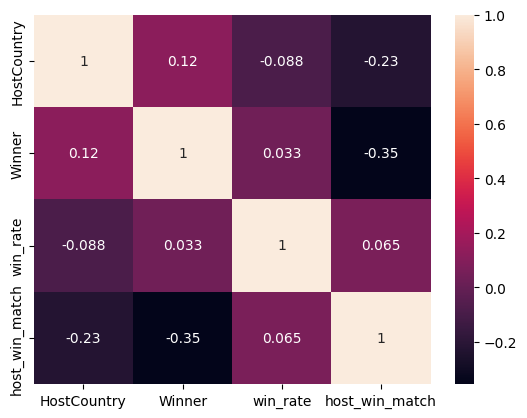

In [36]:
import seaborn as sns

sns.heatmap(info_v_df.iloc[:, 1:].corr(), annot=True)

